# Blood Transfusion

## Importing  libraries And Algorithm

In [1]:
import pandas as PA
import numpy as NU
import matplotlib.pyplot as PLT
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter('ignore')

### Read CSV File

In [2]:
Blood=PA.read_csv("C:/Users/hp/Desktop/Data Sets/BLOOD_TRANSFUSION.csv")

In [3]:
Blood
# Recency-months since last donation
# Frequency- total num of donation
# Monetary -total blood donated 
# Time-moths since first donation
# Whether he/she donated blood in march 2007
# ( 1 stand for donating blood and 0 stand for not donating)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
Blood.head(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1


In [5]:
Blood.tail(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [6]:
Blood.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [7]:
Blood.rename(columns={'Recency (months)':'Recency','Frequency (times)':'Frequency',
                      'Monetary (c.c. blood)':'Monetary',
                      'Time (months)':'Time',
                      'whether he/she donated blood in March 2007':'whether'},inplace=True)

In [8]:
Blood.size

3740

In [9]:
Blood.shape

(748, 5)

In [10]:
Blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   whether    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [11]:
Blood.describe()

,Recency,Frequency,Monetary,Time,whether
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


### Check For Missing Values

In [12]:
Blood.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
whether      0
dtype: int64

## Visuvalization Of Data Set

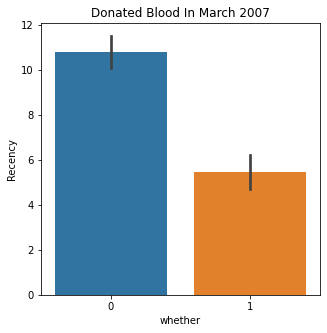

In [13]:
PLT.figure(figsize=(5,5))
sns.barplot(Blood["whether"],Blood["Recency"])
PLT.title("Donated Blood In March 2007")
PLT.show()

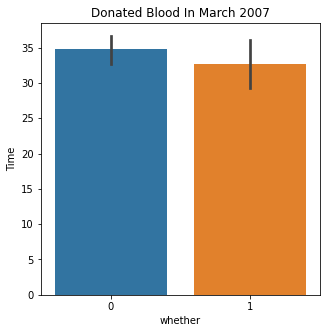

In [14]:
PLT.figure(figsize=(5,5))
sns.barplot(Blood["whether"],Blood["Time"])
PLT.title("Donated Blood In March 2007")
PLT.show()

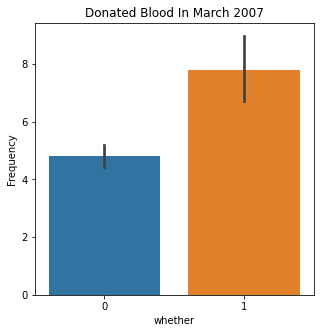

In [15]:
PLT.figure(figsize=(5,5))
sns.barplot(Blood["whether"],Blood["Frequency"]) 
PLT.title("Donated Blood In March 2007")
PLT.show()

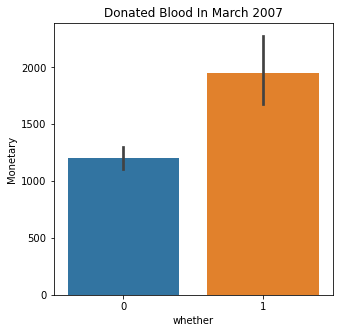

In [16]:
PLT.figure(figsize=(5,5))
sns.barplot(Blood["whether"],Blood["Monetary"])
PLT.title("Donated Blood In March 2007")
PLT.show()

<AxesSubplot:>

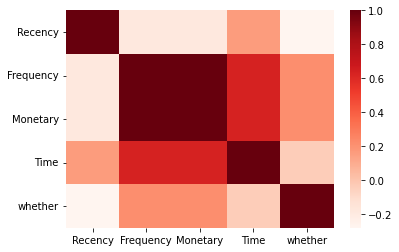

In [17]:
sns.heatmap(Blood.corr(),cmap="Reds")

<AxesSubplot:>

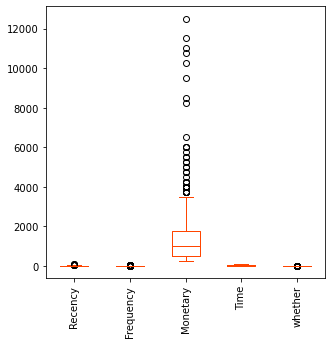

In [18]:
Blood.plot(kind="box",figsize=(5,5),rot=90,color="OrangeRed")

<AxesSubplot:>

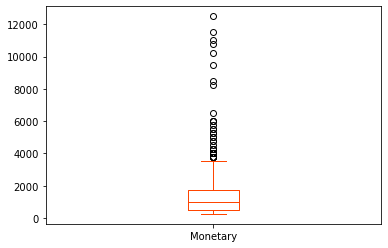

In [19]:
Blood.Monetary.plot(kind="box",color="OrangeRed")

In [20]:
Blood=Blood[Blood.Monetary<3000]

<AxesSubplot:>

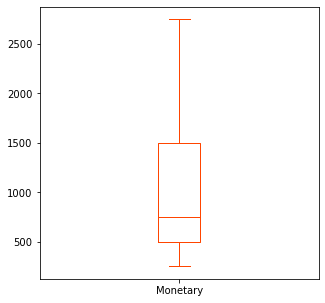

In [21]:
Blood.Monetary.plot(kind="box",figsize=(5,5),color="OrangeRed")

## Split The Data

In [22]:
x=Blood.drop("whether",axis=1)
y=Blood.whether

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

In [24]:
x_train.shape,y_train.shape

((466, 4), (466,))

In [25]:
x_train.head(3)

,Recency,Frequency,Monetary,Time
697,14,3,750,35
392,4,2,500,59
589,2,1,250,2


In [26]:
x_train.tail(3)

,Recency,Frequency,Monetary,Time
285,11,2,500,14
298,14,2,500,14
442,11,2,500,52


In [27]:
x_test.shape

(201, 4)

In [28]:
x_test.head()

,Recency,Frequency,Monetary,Time
277,4,3,750,34
352,11,5,1250,50
474,21,2,500,35
428,23,3,750,28
701,16,1,250,16


In [29]:
x_test.tail()

,Recency,Frequency,Monetary,Time
257,11,7,1750,37
413,16,4,1000,45
453,21,1,250,21
437,14,3,750,52
385,14,7,1750,72


# Machine Learning Algorithm

## Logistic Regression 

In [30]:
model_LR=LogisticRegression()

In [31]:
model_LR.fit(x_train,y_train)

LogisticRegression()

In [32]:
predict=model_LR.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [33]:
accuracy_score(y_test,predict)

0.8159203980099502

In [34]:
confusion_matrix(y_test,predict)

array([[159,   5],
       [ 32,   5]], dtype=int64)

## Decision Tree

In [35]:
model_DR=DecisionTreeClassifier()

In [36]:
model_DR.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
predict=model_DR.predict(x_test)
predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [38]:
accuracy_score(y_test,predict)

0.7611940298507462

In [39]:
confusion_matrix(y_test,predict)

array([[144,  20],
       [ 28,   9]], dtype=int64)

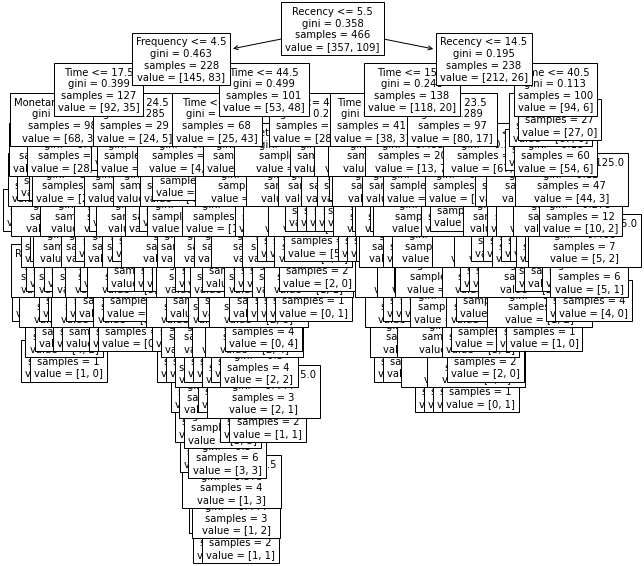

In [40]:
from sklearn.tree import plot_tree
PLT.figure(figsize=(10,10))
decision_tree=plot_tree(decision_tree=model_DR,feature_names=x.columns,fontsize=10)

## KNN (K-Nearest Neighbor)

In [41]:
model_KNN=KNeighborsClassifier()

In [42]:
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
predict=model_KNN.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [44]:
accuracy_score(y_test,predict)

0.8009950248756219

In [45]:
confusion_matrix(y_test,predict)

array([[152,  12],
       [ 28,   9]], dtype=int64)

## Navie Baye's

In [46]:
model_NS=GaussianNB()

In [47]:
model_NS.fit(x_train,y_train)

GaussianNB()

In [48]:
predict=model_NS.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [49]:
accuracy_score(y_test,predict)

0.8208955223880597

In [50]:
confusion_matrix(y_test,predict)

array([[150,  14],
       [ 22,  15]], dtype=int64)

## SVC

In [51]:
model_SVC=SVC()

In [52]:
model_SVC.fit(x_train,y_train)

SVC()

In [53]:
predict=model_SVC.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [54]:
accuracy_score(y_test,predict)

0.8159203980099502

In [55]:
confusion_matrix(y_test,predict)

array([[164,   0],
       [ 37,   0]], dtype=int64)

## Random Forest

In [56]:
model_RF=RandomForestClassifier()

In [57]:
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
predict=model_RF.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_test,predict)

0.8059701492537313

In [60]:
confusion_matrix(y_test,predict)

array([[151,  13],
       [ 26,  11]], dtype=int64)

## Gradient Boosting

In [61]:
model_GB=GradientBoostingClassifier()

In [62]:
model_GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
model_GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
predict=model_GB.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [65]:
accuracy_score(y_test,predict)

0.8109452736318408

In [66]:
confusion_matrix(y_test,predict)

array([[153,  11],
       [ 27,  10]], dtype=int64)

In [67]:
# Logistic Regression  accuracy_score = 0.7688888888888888  
# Decision Tree accuracy_score        = 0.6844444444444444
# KNN accuracy_score                  =0.6977777777777778
# Navie Baye's accuracy_score         =0.76
# SVC  accuracy_score                 =0.7466666666666667
# Random Forest accuracy_score        =0.7155555555555555
# Gradient Boosting accuracy_score    =0.7422222222222222

### Highest Accuracy Score For Logistic Regression